In [ ]:
'''
Simple Deep Convolutional Neural Network 
trained on the MNIST dataset involving the Dropout algorithm.
Achieved accuracy ~ 98%
'''
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
#Test-Train data split
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#Visualizing the images via plots
plt.subplot(221)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[4], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[11], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[12], cmap=plt.get_cmap('gray'))
plt.show()
#Reshaping data to make it compatible to feed it to the neural network
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Dividing by 255 to obtain all values in the 0,1 range
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#Convert class vectors to binary class matrices; Converting each number from 0-9 into 1 10-bit sequence
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
#Building the final model involving dropouts
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()
#Defining the training parameters
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
#Training the model
model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))
#Evaluating accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Loss:', score[0]*100)
print('Accuracy:', score[1]*100)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

In [3]:
yelp = pd.read_csv('E://Yelp//DATA//review.csv')
yelp.shape

(149623, 10)

In [4]:
print(yelp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149623 entries, 0 to 149622
Data columns (total 10 columns):
Unnamed: 0     149623 non-null int64
business_id    149623 non-null object
cool           149623 non-null int64
date           149623 non-null object
funny          149623 non-null int64
review_id      149623 non-null object
stars          149623 non-null int64
text           149623 non-null object
useful         149623 non-null int64
user_id        149623 non-null object
dtypes: int64(5), object(5)
memory usage: 11.4+ MB
None


In [5]:
print(yelp.describe())

          Unnamed: 0           cool          funny          stars  \
count  149623.000000  149623.000000  149623.000000  149623.000000   
mean    74811.000000       0.266263       0.273835       3.662391   
std     43192.584001       0.911663       1.363518       1.548881   
min         0.000000       0.000000       0.000000       1.000000   
25%     37405.500000       0.000000       0.000000       2.000000   
50%     74811.000000       0.000000       0.000000       4.000000   
75%    112216.500000       0.000000       0.000000       5.000000   
max    149622.000000      90.000000     328.000000       5.000000   

              useful  
count  149623.000000  
mean        1.058133  
std         2.814067  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max       536.000000  


In [6]:
yelp['text length'] = yelp['text'].apply(len)
yelp.head()

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,text,useful,user_id,text length
0,0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g,449
1,1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g,317
2,2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g,156
3,3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g,901
4,4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g,165


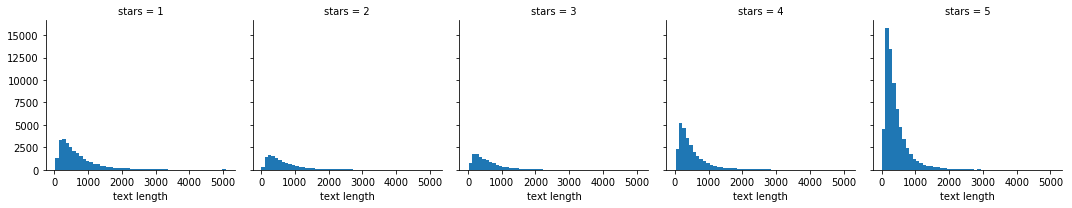

In [7]:
g = sns.FacetGrid(data=yelp, col='stars')
g.map(plt.hist, 'text length', bins=50)

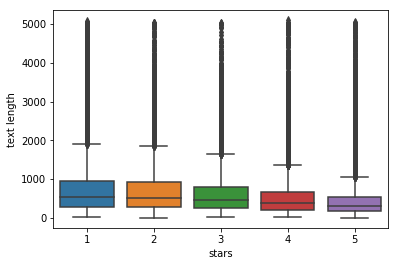

In [8]:
sns.boxplot(x='stars', y='text length', data=yelp)

In [9]:
stars = yelp.groupby('stars').mean()
stars.corr()

,Unnamed: 0,cool,funny,useful,text length
Unnamed: 0,1.000000,0.045960,-0.273556,-0.515599,0.096747
cool,0.045960,1.000000,-0.875657,-0.712477,-0.951408
funny,-0.273556,-0.875657,1.000000,0.951315,0.905406
useful,-0.515599,-0.712477,0.951315,1.000000,0.732253
text length,0.096747,-0.951408,0.905406,0.732253,1.000000


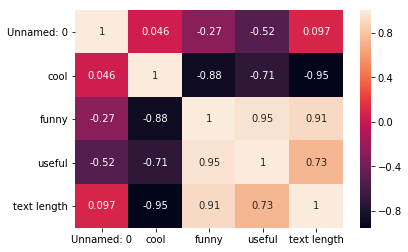

In [10]:
sns.heatmap(data=stars.corr(), annot=True)

In [11]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]
yelp_class.shape

(95919, 11)

In [12]:
X = yelp_class['text']
y = yelp_class['stars']

In [14]:
X

1         I love this place! My fiance And I go here atl...
2         Terrible. Dry corn bread. Rib tips were all fa...
4         Delicious healthy food. The steak is amazing. ...
5         This place sucks. The customer service is horr...
6         If you like Thai food, you have to try the ori...
7         AMAZING!!!\r\n\r\n I was referred here by a fr...
10        I have been an Emerald Club member for a numbe...
11        The score should be negative. Its HORRIBLE. Th...
12        I went there twice and I am pretty happy with ...
14        Sansotei serves some top notch ramen. They tak...
16        Cool little place, nice atmosphere and staff. ...
17        Delicious, friendly staff, cool atmosphere, al...
18        Great haircut, cool atmosphere, and really nic...
19        Finally! After trying many Mexican restaurants...
20        One of the best breakfast places I've been to!...
22        DELICIOUS! forgot to take a before picture but...
23        If I could leave zero stars I 

In [15]:
import string
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [17]:
import nltk
nltk.download()

sample_text = "Hey there! This is a sample review, which happens to contain punctuations."
print(text_process(sample_text))

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
['Hey', 'sample', 'review', 'happens', 'contain', 'punctuations']


In [ ]:
import sklearn

bow_transformer = sklearn.feature_extraction.text.CountVectorizer(analyzer=text_process).fit(X)

In [ ]:
len(bow_transformer.vocabulary_)

In [ ]:
review_25 = X[24]
review_25

In [ ]:
bow_25 = bow_transformer.transform([review_25])
bow_25


In [ ]:
print(bow_transformer.get_feature_names()[11443])
print(bow_transformer.get_feature_names()[22077])

In [ ]:
X = bow_transformer.transform(X)

In [ ]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)
# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print(‘Density: {}’.format((density)))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

In [ ]:
preds = nb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))